In [1]:
# Introduction to statsmodels 
# ===========================

# Table of Contents:
# 1. Setup and Installation
# 2. Creating Sample Data
# 3. Simple Linear Regression
# 4. Understanding Model Results
# 5. Visualization
# 6. Model Diagnostics
# 7. Practice Exercises

In [2]:
# 1. Setup and Installation
# ------------------------
# First, we need to import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# 2. Creating Sample Data
# ----------------------
# Let's create a simple dataset about income and consumption

# Generate synthetic data
n_samples = 100
income = np.linspace(20000, 100000, n_samples)
# Add some random noise to make it realistic
consumption = 5000 + 0.6 * income + np.random.normal(0, 5000, n_samples)

In [4]:
# Create a DataFrame
data = pd.DataFrame({
    'income': income,
    'consumption': consumption
})

# Let's look at our data
print("First few rows of our dataset:")
print(data.head())
print("\nBasic statistics of our dataset:")
print(data.describe())

First few rows of our dataset:
         income   consumption
0  20000.000000  19483.570765
1  20808.080808  16793.526979
2  21616.161616  21208.139660
3  22424.242424  26069.694737
4  23232.323232  17768.627066

Basic statistics of our dataset:
             income   consumption
count     100.00000    100.000000
mean    60000.00000  40480.767413
std     23443.62988  14972.048382
min     20000.00000  13736.629080
25%     40000.00000  27676.725048
50%     60000.00000  40020.849915
75%     80000.00000  54338.418386
max    100000.00000  65964.437074


In [5]:
# 3. Simple Linear Regression
# --------------------------
# We'll use both methods to perform regression:

# Method 1: Using statsmodels.api (sm)

# First, we need to add a constant term for the intercept
X = sm.add_constant(data['income'])

In [6]:
# Get the y variable
y = data['consumption']

In [7]:
# Create the ols model
model_ols = sm.OLS(y, X)

In [8]:
# Call the fit method
model_fitted = model_ols.fit()

In [10]:
# check the model summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     969.5
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.27e-52
Time:                        19:29:57   Log-Likelihood:                -983.38
No. Observations:                 100   AIC:                             1971.
Df Residuals:                      98   BIC:                             1976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3963.5199   1258.298      3.150      0.0

In [11]:
# Method 2: Using formula API (more intuitive, similar to R)
model_formula = ols('consumption ~ income', data=data).fit()

In [12]:
# 4. Understanding Model Results
# ----------------------------
# Let's look at the results and understand what they mean

print("\nModel Summary:")
print(model_formula.summary())


Model Summary:
                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     969.5
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.27e-52
Time:                        19:29:59   Log-Likelihood:                -983.38
No. Observations:                 100   AIC:                             1971.
Df Residuals:                      98   BIC:                             1976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3963.5199   1258.298    

In [13]:
model_formula.pvalues

Intercept    2.165774e-03
income       1.274388e-52
dtype: float64

In [14]:
# Extract key statistics
print("\nKey Statistics:")
print(f"R-squared: {model_formula.rsquared:.4f}")
print(f"Adjusted R-squared: {model_formula.rsquared_adj:.4f}")
print("\nCoefficients:")
print(model_formula.params)
print("\nP-values:")
print(model_formula.pvalues)


Key Statistics:
R-squared: 0.9082
Adjusted R-squared: 0.9073

Coefficients:
Intercept    3963.519888
income          0.608621
dtype: float64

P-values:
Intercept    2.165774e-03
income       1.274388e-52
dtype: float64


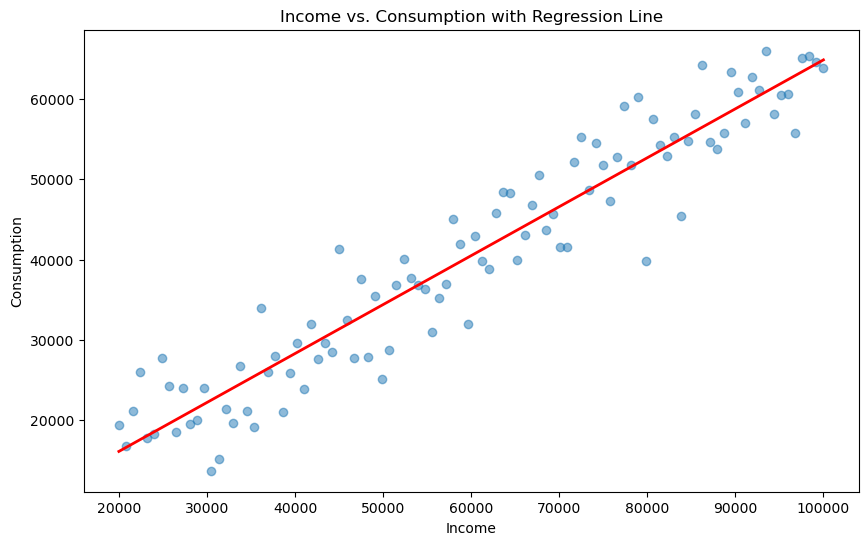

In [15]:
# 5. Visualization
# ---------------
# Let's create some basic visualizations

plt.figure(figsize=(10, 6))
# Scatter plot of data
plt.scatter(data['income'], data['consumption'], alpha=0.5)
# Regression line
plt.plot(data['income'], model_formula.fittedvalues, color='red', linewidth=2)
plt.xlabel('Income')
plt.ylabel('Consumption')
plt.title('Income vs. Consumption with Regression Line')
plt.show()

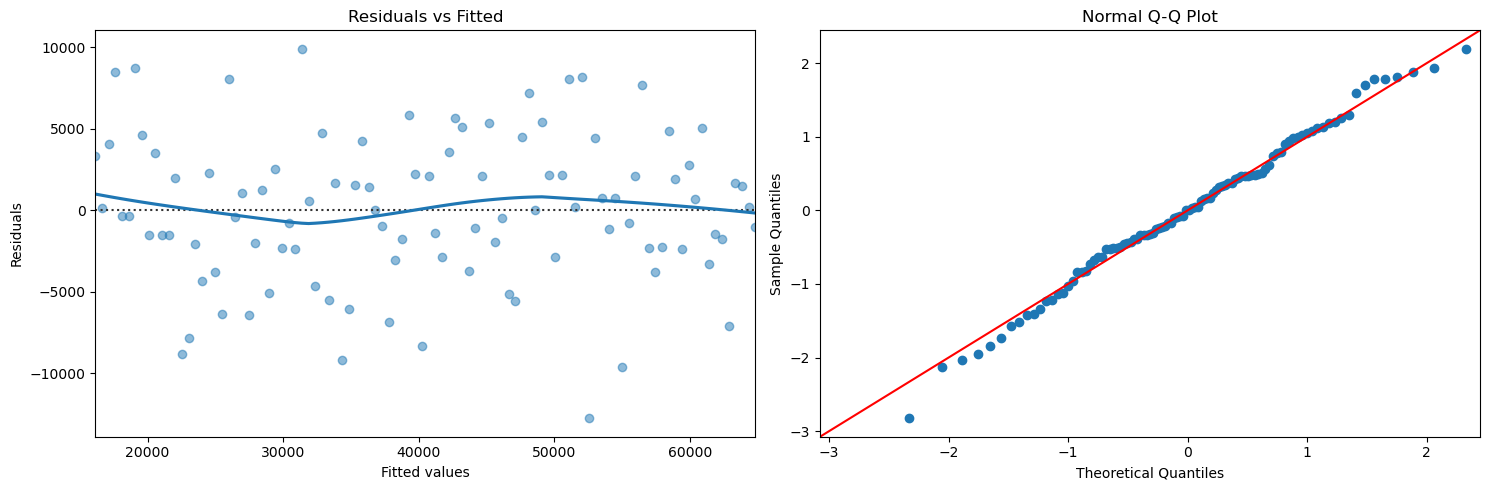


Diagnostic Tests:
Skewness of residuals: -0.16907997700434935
Kurtosis of residuals: -0.05876345693525664


In [16]:
# 6. Model Diagnostics
# -------------------
# Let's check some basic diagnostic plots

# Residual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Residuals vs Fitted
sns.residplot(x=model_formula.fittedvalues, y=model_formula.resid, 
             lowess=True, scatter_kws={'alpha': 0.5}, ax=ax1)
ax1.set_title('Residuals vs Fitted')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')

# Q-Q plot
sm.graphics.qqplot(model_formula.resid, line='45', fit=True, ax=ax2)
ax2.set_title('Normal Q-Q Plot')

plt.tight_layout()
plt.show()

# Print some diagnostic tests
print("\nDiagnostic Tests:")
print("Skewness of residuals:", model_formula.resid.skew())
print("Kurtosis of residuals:", model_formula.resid.kurtosis())

In [17]:
# 7. Making Predictions
# -------------------
# Let's predict consumption for new income values

# Create new income values
new_income = pd.DataFrame({'income': [30000, 50000, 70000, 90000]})

# Make predictions
predictions = model_formula.predict(new_income)

print("\nPredictions for new income values:")
for income, pred in zip(new_income['income'], predictions):
    print(f"Income: ${income:,.2f} -> Predicted Consumption: ${pred:,.2f}")


Predictions for new income values:
Income: $30,000.00 -> Predicted Consumption: $22,222.14
Income: $50,000.00 -> Predicted Consumption: $34,394.56
Income: $70,000.00 -> Predicted Consumption: $46,566.98
Income: $90,000.00 -> Predicted Consumption: $58,739.39


In [18]:
# 8. Practice Exercises
# -------------------

print(
"""
Try these exercises:

1. Create a new dataset with a different relationship 
   (e.g., education years vs. salary)

2. Fit a regression model to your new data

3. Interpret the results:
   - What does the R-squared value tell you?
   - Are your coefficients statistically significant?
   - What do the coefficients mean in real terms?

4. Create your own visualizations:
   - Scatter plot with regression line
   - Residual plot
   - Any other plots you think would be helpful

5. Make predictions for new values in your dataset
"""
)


Try these exercises:

1. Create a new dataset with a different relationship 
   (e.g., education years vs. salary)

2. Fit a regression model to your new data

3. Interpret the results:
   - What does the R-squared value tell you?
   - Are your coefficients statistically significant?
   - What do the coefficients mean in real terms?

4. Create your own visualizations:
   - Scatter plot with regression line
   - Residual plot
   - Any other plots you think would be helpful

5. Make predictions for new values in your dataset



In [19]:
# Example exercise solution template:
def exercise_template():
    # Create your data
    x = np.linspace(0, 10, 100)
    y = 2 + 3*x + np.random.normal(0, 1, 100)
    
    # Create DataFrame
    df = pd.DataFrame({'x': x, 'y': y})
    
    # Fit model
    model = ols('y ~ x', data=df).fit()
    
    # Print results
    print(model.summary())
    
    # Create visualizations
    # [Your visualization code here]
    
    # Make predictions
    # [Your prediction code here]
    
    return model

In [20]:
# Uncomment to run exercise template:
exercise_result = exercise_template()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     8340.
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.24e-96
Time:                        19:30:08   Log-Likelihood:                -136.65
No. Observations:                 100   AIC:                             277.3
Df Residuals:                      98   BIC:                             282.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0122      0.190     10.575      0.0